<a href="https://colab.research.google.com/github/ds-sinhalen/Data-Analysis-6-7-Corr_Statistic_and_ANOVA_/blob/master/Corr_Statistic_and_ANOVA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
df = pd.read_csv("Auto_mobile.csv")
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,highway-L/100km,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,8.703704,11.190476,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,8.703704,11.190476,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,9.038462,12.368421,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,7.833333,9.791667,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,10.681818,13.055556,Low,0,1,1,0


<b><h2> Pearson Correlation</h2></b>

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>


<p3>Pearson Correlation</p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

<p>Pearson Correlation is the default method of the function "corr".  Like before we can calculate the Pearson Correlation of the 'int64' or 'float64'  variables.</p>

In [0]:
df.corr()

 sometimes we would like to know the significant of the correlation estimate. 

<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant or how certain we are about the correlation that we calculated. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

 We can obtain this information using  "stats" module in the "scipy"  library.

In [0]:
from scipy import stats

<b><h5>Horsepower vs Price</h5></b>

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

In [0]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)</p>

<b><h5>Engine-size vs Price</h5></b>

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'Engine-size vs Price'.

In [0]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>

<b><h5>Highway-mpg vs Price</h5></b>

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'Highway-mpg vs Price'.

In [0]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

##### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

<b><h5>Length vs Price</h5></b>

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'Length vs Price'.

In [0]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>

<b><h2 id="anova">ANOVA</h2></b>

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>



<p><b>P-value</b>:  P-value tells how statistically significant is our calculated score value.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.</p>

To analyze categorical variables such as the make variable, we can use a method such as the ANOVA method.  ANOVA can be used to find the correlation between different groups of a categorical variable. According to the car dataset, we can use ANOVA to see if there is any difference in mean price for the different car makes such a Subaru and Honda. The ANOVA test returns two values, the F-test score and the p-value. The F-test calculates the ratio of variation between the groups mean over the variation within each of the sample groups. The p-value shows whether the obtained result is statistically significant. Without going too deep into the details, the F-test calculates the ratio of variation between groups means over the variation within each of the sample group means.

<b><h5>Drive Wheels</h5></b>

<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>Let's see if different types 'drive-wheels' impact  'price', we group the data.</p>

In [0]:
df_gptest = df[['drive-wheels','price']]
df_gptest.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0


In [0]:
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


We can obtain the values of the method group using the method "get_group". 

In [0]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

<b><h>Optional Begin<h><b>

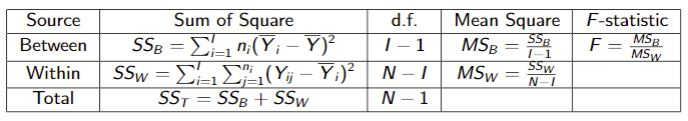

In [0]:
from IPython.display import Image
Image('anova.JPG')

MSB = Variance between group means<br>
MSW = Mean of the within group variance

<b>4wd and fwd</b>

In [0]:
#note that I = 2(two group)
n1 = grouped_test2.get_group('4wd')['price'].shape[0]
n2 = grouped_test2.get_group('fwd')['price'].shape[0]

y1bar = grouped_test2.get_group('4wd')['price'].mean()
y2bar = grouped_test2.get_group('fwd')['price'].mean()
ybar = (sum(grouped_test2.get_group('4wd')['price'].values)+sum(grouped_test2.get_group('fwd')['price'].values))/(n1+n2)
SSB = n1*(y1bar-ybar)**2+n2*(y2bar-ybar)**2
MSB = SSB/(2-1)

sqr1 = sum((grouped_test2.get_group('4wd')['price'].values-y1bar)**2)
sqr2 = sum((grouped_test2.get_group('fwd')['price'].values-y2bar)**2)
SSW = sqr1 + sqr2
MSW = SSW/(n1+n2-2)

F = MSB/MSW
F

0.6654657502523023

<b>4wd and rwd</b>

In [0]:
#note that I = 2(two group)
n1 = grouped_test2.get_group('4wd')['price'].shape[0]
n2 = grouped_test2.get_group('rwd')['price'].shape[0]

y1bar = grouped_test2.get_group('4wd')['price'].mean()
y2bar = grouped_test2.get_group('rwd')['price'].mean()
ybar = (sum(grouped_test2.get_group('4wd')['price'].values)+sum(grouped_test2.get_group('rwd')['price'].values))/(n1+n2)
SSB = n1*(y1bar-ybar)**2+n2*(y2bar-ybar)**2
MSB = SSB/(2-1)
sqr1 = sum((grouped_test2.get_group('4wd')['price'].values-y1bar)**2)
sqr2 = sum((grouped_test2.get_group('rwd')['price'].values-y2bar)**2)
SSW = sqr1 + sqr2
MSW = SSW/(n1+n2-2)
F = MSB/MSW
F

8.580681368924761

<b><h>Optional End<h><b>

we can use the function 'f_oneway' in the module 'stats'  to obtain the <b>F-test score</b> and <b>P-value</b>.

In [0]:
from scipy import stats

In [0]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated? 

<b>fwd and rwd</b>

In [0]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


<b>4wd and rwd</b>

In [0]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


<b>4wd and fwd</b>

In [0]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


<h3>Conclusion: Important Variables</h3>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>